### Dataset computation

#### Data Extraction and Data Cleaning

In [36]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from dateutil import parser
import os

try:
  top = Path(__file__ + '../..').resolve()
  wd = str(top)
except:
  wd = os.getcwd()

movie = pd.read_csv(wd+"/resources/movie_metadata.csv")
df = movie[["movie_title", "actor_1_name", "title_year", "country", "gross"]]

# Data Cleaning
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df.dropna(inplace=True)
#df.dropna()
#df.dtypes
df["title_year"]=df["title_year"].astype(int)
df.sort_values(by='gross', ascending=False)
df.head(100)


/var/folders/dj/wcp4hvwd7wzglrm85gjck8lr0000gn/T/ipykernel_39383/4176450229.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/dj/wcp4hvwd7wzglrm85gjck8lr0000gn/T/ipykernel_39383/4176450229.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
/var/folders/dj/wcp4hvwd7wzglrm85gjck8lr0000gn/T/ipykernel_39383/4176450229.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

,movie_title,actor_1_name,title_year,country,gross
0,Avatar,CCH Pounder,2009,USA,760505847.00000000000000000000
1,Pirates of the Caribbean: At World's End,Johnny Depp,2007,USA,309404152.00000000000000000000
2,Spectre,Christoph Waltz,2015,UK,200074175.00000000000000000000
3,The Dark Knight Rises,Tom Hardy,2012,USA,448130642.00000000000000000000
5,John Carter,Daryl Sabara,2012,USA,73058679.00000000000000000000
...,...,...,...,...,...
97,Inception,Leonardo DiCaprio,2010,USA,292568851.00000000000000000000
99,The Hobbit: An Unexpected Journey,Aidan Turner,2012,USA,303001229.00000000000000000000
100,The Fast and the Furious,Paul Walker,2001,USA,144512310.00000000000000000000
101,The Curious Case of Benjamin Button,Brad Pitt,2008,USA,127490802.00000000000000000000


# Theoritical Moments
From the histogram we can see that exponential probability distribution is best suited for this. 
Using the formula ***lambda = 1/scale and 1/mean***. 

In [37]:
scale_inf_theo = np.mean(df["gross"])

#To verify the result we use expon.fit() method. 
[loc_inf, scale_inf] = expon.fit(df["gross"])
(scale_inf, loc_inf, scale_inf_theo)

(88180518.81505516, 4091.0, 88184609.81505516)

# Exponential PDF
We first calculate the min and max of the data, then plot the exponential pdf in red on top of the histogram. 

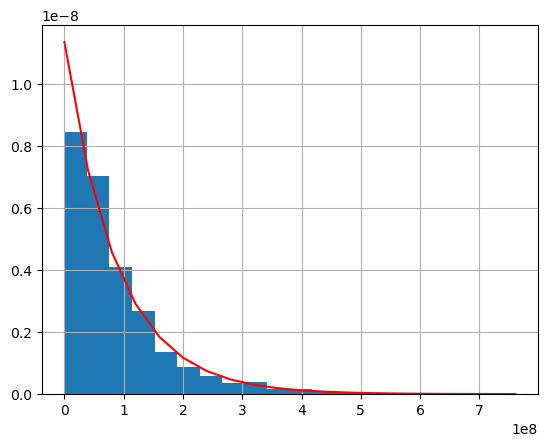

In [38]:
max_data_inf = np.max(df["gross"])
min_data_inf = np.min(df["gross"])

df.gross.hist(density = True, bins = 20)
plt.plot(np.linspace(min_data_inf, max_data_inf, 20), expon.pdf(np.linspace(min_data_inf, max_data_inf, 20), loc = loc_inf, scale = scale_inf_theo), color = "red")

# Prediction
P(x) = (1/scale_inf_theo) * exp(-(1/scale_inf_theo) * x)

In [39]:
#probablility of a movie to make $1,000,000,000 which as expected is very less. 
import math
prob = (1/scale_inf_theo) * math.exp(-(1/scale_inf_theo) * 1000000000)
print(format(prob,'.20f'))

0.00000000000013482615
